In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [3]:
# visual
%config InlineBackend.figure_format = 'retina'
sns.set_context('notebook')

In [4]:
# read the file into a list for analysis
df = pd.read_excel('reviews.xlsx', sheet_name='Restaurant_Reviews')
review_list = []
for values in df.values:
    if not isinstance(values[0], float):
        review_list.append(values[0])

In [5]:
# analyse each element of list and fill arrays with positive and negative sentiments seperately.
sentiment_polarity = []
sentiment_review = []
    
for sen in review_list:
    if sia.polarity_scores(sen)["pos"] > sia.polarity_scores(sen)["neg"]:
        sentiment_polarity.append(sia.polarity_scores(sen)["pos"])
    else:
        sentiment_polarity.append(sia.polarity_scores(sen)["neg"] * -1)
    sentiment_review.append(sen)


In [6]:
# create a new csv with the string + compound value
df_out = pd.DataFrame({"review": sentiment_review,
                      "sentiment_polarity": sentiment_polarity })
df_out.to_csv('out.csv', index=False)  

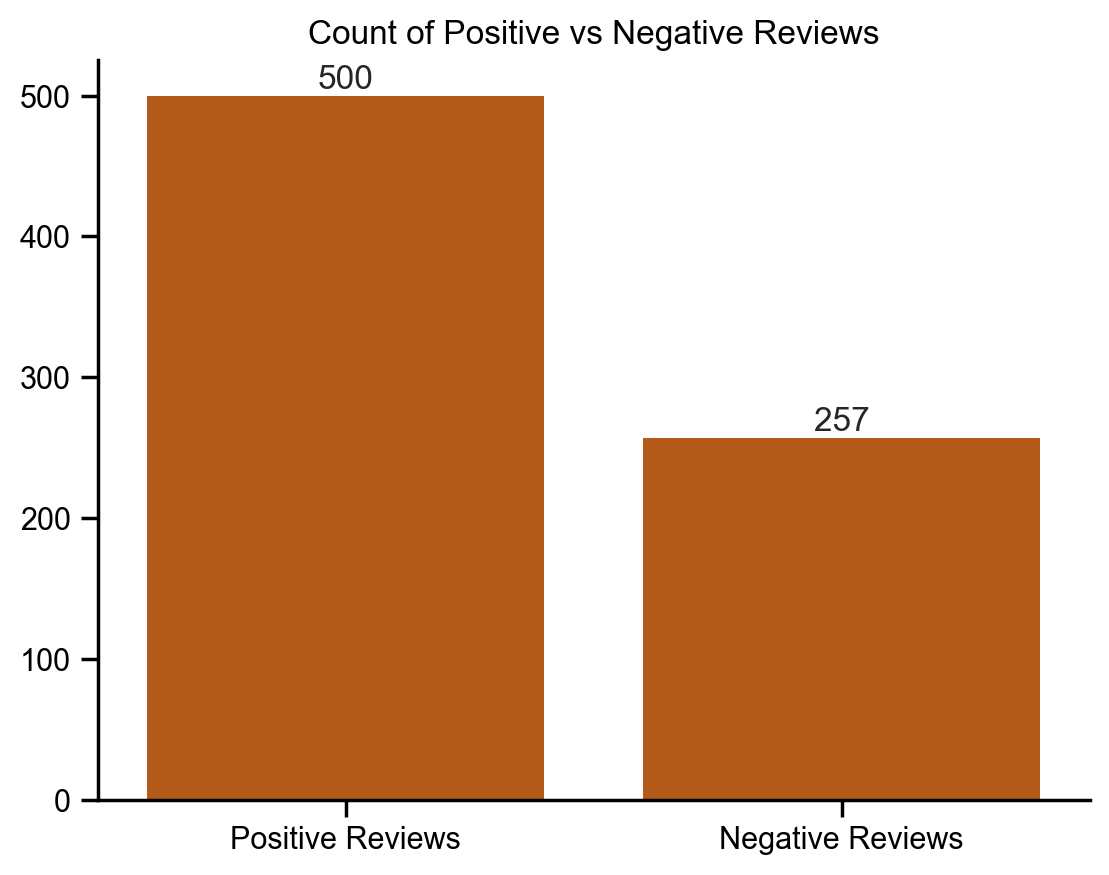

In [7]:
# count amount of positive vs negative reviews
count_pos = 0
count_neg = 0
for sentiment in sentiment_polarity:
    if sentiment > 0:
        count_pos += 1
    elif sentiment < 0:
        count_neg += 1
        
bar = sns.barplot(y=[count_pos,count_neg], 
                x=["Positive Reviews","Negative Reviews"],
                color = "#CC5500")

sns.set_style("whitegrid")

for i in bar.containers:
    bar.bar_label(i)
bar.set_title("Count of Positive vs Negative Reviews")
sns.despine()
plt.show()

In [8]:
# print 5 highest and 5 lowest values
table_review = []
table_sentiment = []

for i in range(5):
    # set latest highest and lowest from sentiment_polarity
    highest_pos = sentiment_review[sentiment_polarity.index(max(sentiment_polarity))]
    lowest_pos = sentiment_review[sentiment_polarity.index(min(sentiment_polarity))]
    
    # store for table
    table_review.append(highest_pos)
    table_sentiment.append(max(sentiment_polarity))
    
    table_review.append(lowest_pos)
    table_sentiment.append(min(sentiment_polarity))

    # remove old highest and lowest
    sentiment_polarity.pop(sentiment_polarity.index(max(sentiment_polarity)))
    sentiment_review.pop(sentiment_polarity.index(max(sentiment_polarity)))
    sentiment_polarity.pop(sentiment_polarity.index(min(sentiment_polarity)))
    sentiment_review.pop(sentiment_polarity.index(min(sentiment_polarity)))

In [9]:
# creating a table to display the highest rated positive and negative reviews
table_data = []
for i in range(len(table_review)):
    table_data.append([table_review[i],table_sentiment[i]])
    
col_names = ["Review", "Sentiment Polarity"]

print(tabulate(table_data, headers=col_names))

Review                                                                                          Sentiment Polarity
--------------------------------------------------------------------------------------------  --------------------
DELICIOUS!!                                                                                                  1
RUDE & INCONSIDERATE MANAGEMENT.                                                                            -0.855
Pretty awesome place.                                                                                        0.88
I had the chicken Pho and it tasted very bland.                                                             -0.814
Good value, great food, great service.                                                                       0.871
Terrible service!                                                                                           -0.787
We had a group of 70+ when we claimed we would only have 40 and they handled us beaut

In [11]:
for review in sentiment_review:
    if "management" in review:
        print(review)

AttributeError: 'str' object has no attribute 'contains'